# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

In [0]:
!pip install category_encoders
from category_encoders import TargetEncoder

     |████████████████████████████████| 102kB 4.6MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files
from tqdm import tqdm

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, RandomizedSearchCV
from xgboost import XGBClassifier
from joblib import dump, load

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Mounting drive work folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Appliedai colab/Assignment 11 - GBDT donors choose/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Appliedai colab/Assignment 11 - GBDT donors choose


In [0]:
# sample_data = {'State':['A','B','C','A','A','B','A','A','C','C'], 'class':[0,1,1,0,1,1,0,1,1,0]}
# df_sample = pd.DataFrame(sample_data)
# X_sample = df_sample[['State']] #2 square brackets selects single column as a dataframe rather than a series
# y_sample = df_sample[['class']]

In [0]:
# # alpha is used for laplace smoothing
# feature = 'State'
# alpha = 0
# response_array = response_coding(alpha, feature, X_sample, y_sample)
# response_coded_df = rc_df(response_array, feature)
# response_coded_df

<h1>1. GBDT (xgboost/lightgbm/catboost) </h1>

## 1.1 Loading Data

In [0]:
data = pd.read_csv('preprocessed_final.csv', nrows = 50000)
data = data.drop(['teacher_id','Unnamed: 0'], axis =1)

In [0]:
data.head()

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity,std_price,nrm_price
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.60,23,-0.390533,0.015397
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.00,1,0.002396,0.029839
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",1,0,"\r\n\""True champions aren't always the ones th...",516.85,22,0.595191,0.051628
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,My students need to engage in Reading and Math...,4,1,I work at a unique school filled with both ESL...,232.90,4,-0.177469,0.023228
4,mrs,tx,grades_prek_2,math_science,mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,1,1,Our second grade classroom next year will be m...,67.98,4,-0.626236,0.006733


Create a transformer that'll take all categorical rows, encode them to response_coding, concats the rows and deletes the Original rows.

In [0]:
#https://github.com/Lalit-Yadav-E1483/ml_case_studies/blob/7da02bdef5512c6ab636727a2a589072b0e2d515/cancer_diagnosis/initial_analysis.ipynb
def response_table(alpha, feature, X, y):
    value_count = X[feature].value_counts()
    gv_dict = dict()
    y_series = y[y.columns[0]]
    
    for i, denominator in value_count.items():
        vec = []
        for k in range(y_series.unique().size):
            cls_cnt = X.loc[(y_series==k) & (X[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        gv_dict[i]=vec
    return gv_dict, y_series, value_count

def response_coding(alpha, feature, X, y):
    gv_dict, y_series, value_count = response_table(alpha, feature, X, y)

    gv_fea = []
    for index, row in X.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/y_series.unique().size for _ in range(y_series.unique().size)])
    return np.array(gv_fea)

def rc_df(response_array, feature):
  response_coded_df = pd.DataFrame()
  for i in range(response_array.shape[1]):
    name = feature + '_' + str(i)
    response_coded_df[name] = response_array[:,i]
  return response_coded_df

In [0]:
#Custom Transformer that returns passed column as response coding and deletes the original column
from sklearn.base import BaseEstimator, TransformerMixin

class response_coding_transformer( BaseEstimator, TransformerMixin ):
  #Class Constructor
  def __init__( self, feature):
    self._feature = feature

  #Return self nothing else to do here    
  def fit( self, X, y):
    self._temp = pd.DataFrame()
    for feature in self._feature:
      alpha = 0
      response_array = response_coding(alpha, feature, X, y)
      response_coded_df = rc_df(response_array, feature)
      self._temp = pd.concat([self._temp, response_coded_df], axis=1)
    self.new_x = X.drop(self._feature, axis = 1)
    return self.new_x
  
  #Method that describes what we need this transformer to do
  def transform( self, X):
    return pd.concat([self.new_x, self._temp], axis=1)

In [0]:
X = data.drop('project_is_approved', axis =1)
y = data[['project_is_approved']]
categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']

In [0]:
# dump(X, 'X_encoded_response_coding.pickle')

In [0]:
text_transformer = TfidfVectorizer(stop_words = 'english', min_df = 10)

numeric_features = ['teacher_number_of_previously_posted_projects', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

text_transformer = Pipeline(steps=[
    ('trans', text_transformer)])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title"),
        ('summary', text_transformer, "project_resource_summary")]
        ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

In [0]:
X_encoded = preprocessor.fit_transform(X)
# X_encoded = load('Trained_models/X_encoded_50000.joblib')

In [0]:
X_encoded

<50000x18148 sparse matrix of type '<class 'numpy.float64'>'
	with 6043014 stored elements in Compressed Sparse Row format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, , shuffle=True, stratify=y)

SyntaxError: ignored

**Set 1:** TFIDF + response coding

categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)

**PIPELINE**

In [0]:
# A set of winning parameters

# 'objective': 'binary:logistic',
#           'eval_metric': 'auc',
#           'eta': 0.01,
#           'max_depth': 7,
#           'subsample': 0.8, 
#           'colsample_bytree': 0.4,
#           'min_child_weight': 10,
#           'gamma': 2

In [0]:
seed = 42
text_transformer = TfidfVectorizer(stop_words = 'english', min_df = 10)
model = XGBClassifier(objective = 'binary:logistic',
                      random_state = seed, 
                      eval_metric = ["auc","error"],
                      verbosity = 1)
pipeline = Pipeline(steps=[('classifier',  model)])
%time pipeline.fit(X_train, y_train);
print("model accuracy score: %.3f" % pipeline.score(X_test, y_test))

[15:49:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:49:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

In [0]:
#model assessment
pred_test = pipeline.predict(X_test)
pred_train = pipeline.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test))

Train Accuracy:  0.8497333333333333
Test Accuraccy:  0.84752
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.03      0.05      1928
           1       0.85      1.00      0.92     10572

    accuracy                           0.85     12500
   macro avg       0.75      0.51      0.48     12500
weighted avg       0.82      0.85      0.78     12500



**RandomSearch**

In [0]:
# rs = load('Trained_models/75_XGBoost_50000.joblib')

In [0]:
param_grid = {
    'classifier__max_depth': [2,3,5,7],
    'classifier__n_estimators': [50,200,400,800,2000]
}

rs = RandomizedSearchCV(pipeline, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1,\
                  verbose = 10 , return_train_score = True)

%time rs.fit(X_train, y_train)
print(("best classifier from search: %.3f"
       % rs.score(X_test, y_test)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 128.5min finished


[17:59:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:59:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pr

In [0]:
dump(rs, 'XGBoost_5x4_2000_50000.joblib')

['XGBoost_5x4_2000_50000.joblib']

In [0]:
# dump(rs, '75_XGBoost_50000.joblib')
# rs = load('Manual XGBoost_RS.joblib')

['75_XGBoost_50000.joblib']

In [0]:
rs.param_distributions

{'classifier__max_depth': [2, 3, 5, 7],
 'classifier__n_estimators': [50, 200, 400, 800, 2000]}

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(rs.cv_results_)

Model with rank: 1
Mean test score: 0.74829093 (std: 0.00398124)
Parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 2}

Model with rank: 2
Mean test score: 0.74643644 (std: 0.00528468)
Parameters: {'classifier__n_estimators': 2000, 'classifier__max_depth': 2}

Model with rank: 3
Mean test score: 0.74563446 (std: 0.00561376)
Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 5}

Model with rank: 4
Mean test score: 0.74497287 (std: 0.00597932)
Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7}

Model with rank: 5
Mean test score: 0.74495826 (std: 0.00429838)
Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}



In [0]:
results = pd.DataFrame(rs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,178.527693,0.739259,1.196565,0.023200,400,2,"{'classifier__n_estimators': 400, 'classifier_...",0.743310,0.748508,0.753055,0.748291,0.003981,1,0.847435,0.844792,0.840995,0.844407,0.002643
1,90.296474,0.474537,1.224897,0.032736,200,2,"{'classifier__n_estimators': 200, 'classifier_...",0.736561,0.740152,0.746878,0.741197,0.004276,7,0.804722,0.799426,0.797669,0.800606,0.002998
2,216.139307,0.816696,1.303309,0.018554,200,5,"{'classifier__n_estimators': 200, 'classifier_...",0.739111,0.744979,0.752814,0.745634,0.005614,3,0.946083,0.945071,0.943000,0.944718,0.001283
3,1275.552387,8.107730,2.353218,0.017259,2000,3,"{'classifier__n_estimators': 2000, 'classifier...",0.731474,0.740773,0.744490,0.738912,0.005474,9,0.996636,0.996263,0.996092,0.996330,0.000227
4,297.377571,1.552551,1.427640,0.021137,200,7,"{'classifier__n_estimators': 200, 'classifier_...",0.738666,0.743249,0.753005,0.744973,0.005979,4,0.987742,0.986644,0.985316,0.986567,0.000992
5,131.778366,0.984578,1.191950,0.041907,200,3,"{'classifier__n_estimators': 200, 'classifier_...",0.740027,0.744346,0.750502,0.744958,0.004298,5,0.857892,0.855539,0.854749,0.856060,0.001335
6,36.102921,0.200990,1.144660,0.059078,50,3,"{'classifier__n_estimators': 50, 'classifier__...",0.721300,0.721898,0.731075,0.724757,0.004473,10,0.769574,0.766833,0.765975,0.767461,0.001535
7,871.246983,0.368240,1.866078,0.081062,2000,2,"{'classifier__n_estimators': 2000, 'classifier...",0.738970,0.749890,0.750450,0.746436,0.005285,2,0.963268,0.963542,0.962705,0.963172,0.000348
8,838.712588,5.145101,1.993968,0.030677,800,5,"{'classifier__n_estimators': 800, 'classifier_...",0.731983,0.743386,0.752847,0.742738,0.008530,6,0.997509,0.997286,0.996899,0.997231,0.000252
9,961.654886,267.228674,2.213530,0.503360,800,7,"{'classifier__n_estimators': 800, 'classifier_...",0.730868,0.737288,0.749600,0.739252,0.007772,8,0.999987,0.999968,0.999984,0.999980,0.000008


In [0]:
rs.cv_results_['mean_test_score']

array([0.74829093, 0.74119676, 0.74563446, 0.73891225, 0.74497287,
       0.74495826, 0.72475733, 0.74643644, 0.74273808, 0.73925154])

In [0]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
max_depth = rs.param_distributions['classifier__max_depth']
n_estimators = rs.param_distributions['classifier__n_estimators']
plot_grid_search(rs.cv_results_, n_estimators, max_depth, 'N Estimators', 'max depth')

ValueError: ignored

In [0]:
rs.best_params_, rs.best_score_

({'classifier__max_depth': 2, 'classifier__n_estimators': 400},
 0.7482909274563629)

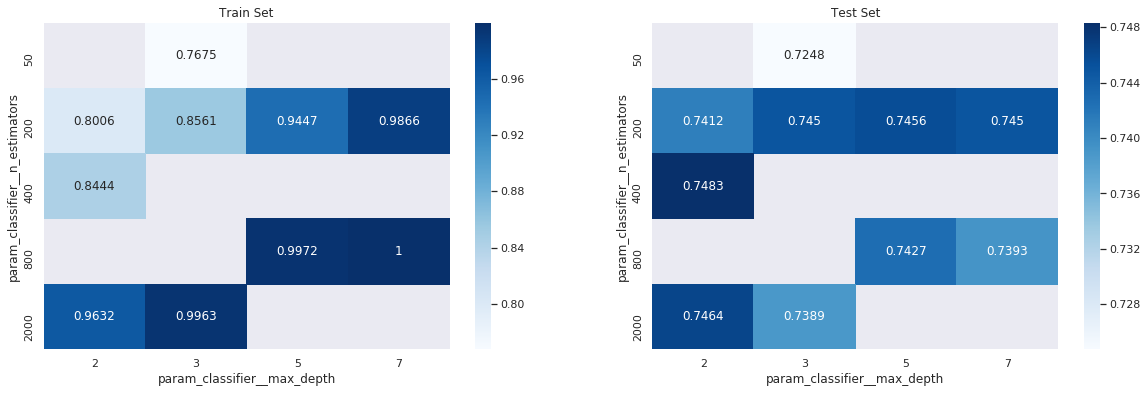

In [0]:
#Heatmaps
sns.set()
max_scores1 = pd.DataFrame(rs.cv_results_).groupby(['param_classifier__n_estimators', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0], cmap = 'Blues')
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1], cmap = 'Blues')
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

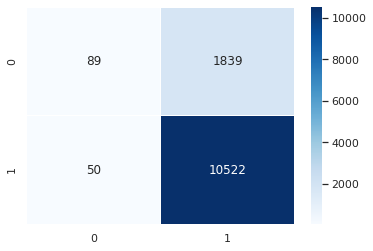

In [0]:
y_pred = rs.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,  annot=True,  cmap = 'Blues', fmt = 'g', linewidths=.5);

### Best model

In [0]:
#https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
param_grid = {
    'classifier__max_depth': [3],
    'classifier__n_estimators': [800]
}

rs2 = RandomizedSearchCV(pipeline, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1,\
                  verbose=10, return_train_score = True, refit = True)

fit_params={"classifier__early_stopping_rounds": 20, 
            "classifier__eval_metric" : ["error","auc"], 
            "classifier__eval_set" : [[X_train, y_train],[X_test, y_test]]}
            
%time rs2.fit(X_train, y_train, **fit_params)
print(("best classifier from grid search: %.3f"
       % rs2.score(X_test, y_test)))

[0]	validation_0-error:0.154187	validation_0-auc:0.649912	validation_1-error:0.15448	validation_1-auc:0.631422
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-error:0.15328	validation_0-auc:0.677855	validation_1-error:0.15408	validation_1-auc:0.653073
[2]	validation_0-error:0.154187	validation_0-auc:0.68212	validation_1-error:0.15448	validation_1-auc:0.657036
[3]	validation_0-error:0.154267	validation_0-auc:0.686611	validation_1-error:0.15424	validation_1-auc:0.663353
[4]	validation_0-error:0.154293	validation_0-auc:0.688214	validation_1-error:0.15424	validation_1-auc:0.665205
[5]	validation_0-error:0.154267	validation_0-auc:0.693355	validation_1-error:0.15424	validation_1-auc:0.668519
[6]	validation_0-error:0.154293	validation_0-auc:0.694213	validation_1-error:0.15424	validation_1-auc:0.668815
[7]	validation_0-error:0.154293	validation_0-auc:0.694326	validatio

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('classifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            eval_metric=['auc',
                                                                         'error'],
                                                            gamma=0,
                                                            learning_rate=0.1,
                                                            max_delta_step=0,
                                               

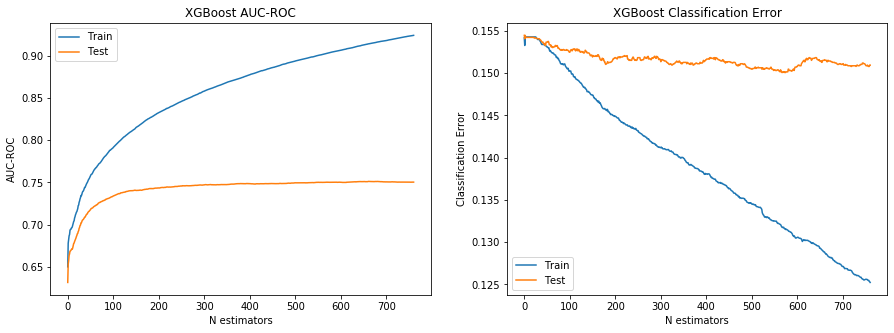

<Figure size 432x288 with 0 Axes>

In [0]:
# retrieve performance metrics
# https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
results = rs2.best_estimator_.named_steps['classifier'].evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot auc
ax[0].plot(x_axis, results['validation_0']['auc'], label='Train')
ax[0].plot(x_axis, results['validation_1']['auc'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost AUC-ROC')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_xlabel('N estimators')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions